C:\Users\Anantks\Desktop\sproject\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Anantks\Desktop\sproject\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Anantks\Desktop\sproject\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


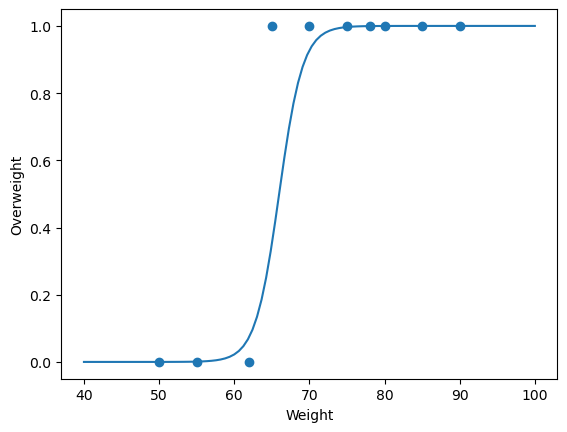

   Height  Weight        BMI  Overweight
0    1.50      50  22.222222           0
1    1.60      65  25.390625           1
2    1.55      70  29.136316           1
3    1.70      80  27.681661           1
4    1.65      62  22.773186           0
5    1.80      90  27.777778           1
6    1.75      85  27.755102           1
7    1.68      75  26.573129           1
8    1.72      78  26.365603           1
9    1.58      55  22.031726           0
Prediction: 1
Probability: [[0.02159801 0.97840199]]
Accuracy: 0.5


In [2]:
 import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = {
    "Height": [1.50, 1.60, 1.55, 1.70, 1.65, 1.80, 1.75, 1.68, 1.72, 1.58],
    "Weight": [50, 65, 70, 80, 62, 90, 85, 75, 78, 55]
}

df = pd.DataFrame(data)
df["BMI"] = df["Weight"] / (df["Height"] ** 2)
df["Overweight"] = (df["BMI"] >= 25).astype(int)

X = df[["Height", "Weight"]]
y = df["Overweight"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

new_person = np.array([[1.70, 72]])
prediction = model.predict(new_person)
prob = model.predict_proba(new_person)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

weights = np.linspace(40, 100, 100)
heights = np.full_like(weights, 1.70)
preds = model.predict_proba(np.column_stack((heights, weights)))[:, 1]

plt.scatter(df["Weight"], df["Overweight"])
plt.plot(weights, preds)
plt.xlabel("Weight")
plt.ylabel("Overweight")
plt.show()

print(df)
print("Prediction:", prediction[0])
print("Probability:", prob)
print("Accuracy:", acc)
